<IPython.core.display.Javascript object>


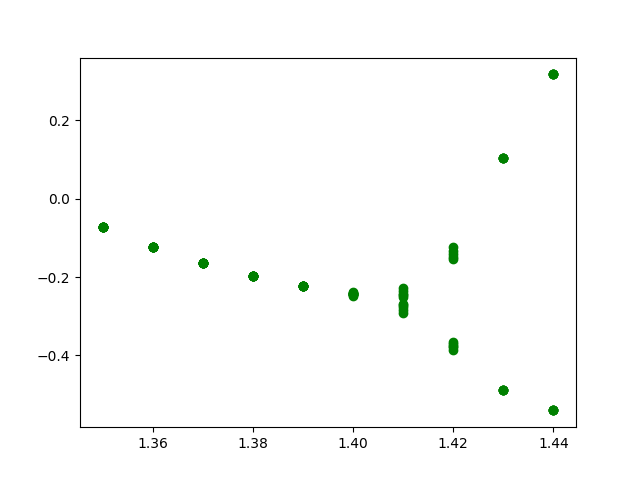

In [7]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

def calculate( theta_0, omega_0, length, dt, q, FdList, fd, N, Nplot):

    thetaResults = []
    FdResults = []

    for Fd in FdList:

        theta = theta_0
        omega = omega_0
        t = 0
        lastTheta = theta
        n = 0
        lastThetas = []
        lastFds = []

        while 1:

            t = t + dt
            newOmega = omega - (g/length)*np.sin(theta)*dt - \
                       q*omega*dt + Fd*np.sin( fd * t ) *dt 

            newTheta = theta + newOmega*dt

            if newTheta > np.pi:
                newTheta = newTheta - 2*np.pi
            if newTheta < -np.pi:
                newTheta = newTheta + 2*np.pi

            if (fd*t - n*2*np.pi) > snapshotPhase:
                currPhase = fd*t - n*2*np.pi
                lastPhase = fd*(t-dt) - n*2*np.pi

                currTheta = newTheta
                lastTheta = theta

                # interpolate best theta....
                #
                interp = ((currPhase - snapshotPhase)*lastTheta + (snapshotPhase - lastPhase)*currTheta)/(currPhase - lastPhase)

                lastThetas.append(interp)
                lastFds.append(Fd)
                n = n + 1


            if n >= N:
                break

            theta = newTheta
            omega = newOmega

        thetaResults.append(lastThetas[-Nplot:])
        FdResults.append(lastFds[-Nplot:])

    return thetaResults, FdResults

snapshotPhase = np.pi/4.0
t = 0.0
length = 9.8
dt = 0.04 
q = 0.5
fd = 0.6667
FdList = np.arange(1.35, 1.45, .01)  # range of Fds (1.35 -> 1.45 in steps of 0.01 )

N = 20      # how many to calculate?
Nplot = 10  # how many to plot?

g = 9.8
period = 2*np.pi/(np.sqrt(g/length))

theta_0 = 0.2
omega_0 = 0.0

thetas, Fds = calculate( theta_0, omega_0, length, dt, q, FdList, fd, N, Nplot)
plt.plot( Fds, thetas, 'go')

